In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
ndarr = np.random.rand(10) # 0-1随机数
dt = pd.date_range('2020-01-01', periods=10) # 生成连续10天日期数据

2020-01-01    0.158677
2020-01-02    0.695798
2020-01-03    0.606261
2020-01-04    0.544162
2020-01-05    0.532995
2020-01-06    0.478455
2020-01-07    0.417923
2020-01-08    0.239452
2020-01-09    0.545134
2020-01-10    0.419492
Freq: D, dtype: float64


<AxesSubplot:>

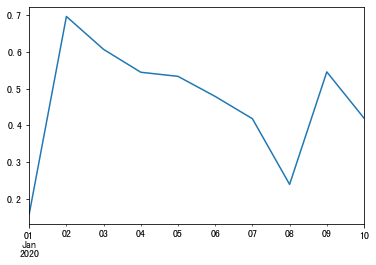

In [3]:
# ------------------- 折线图 ---------------------
# Series 绘制折线图
se = pd.Series(ndarr, index=dt)
print(se)
# se.plot() # 缺省方式默认为是绘制折线图
se.plot.line()

<AxesSubplot:xlabel='a'>

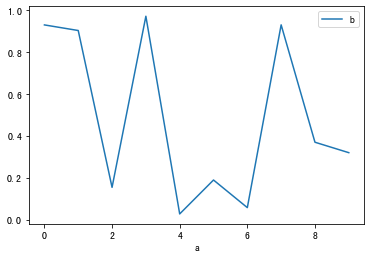

In [4]:
# DataFrame绘制折线图
pd.DataFrame({'a': list(range(0, 10)), 'b': np.random.rand(10)}).plot.line(x='a', y='b')

<AxesSubplot:>

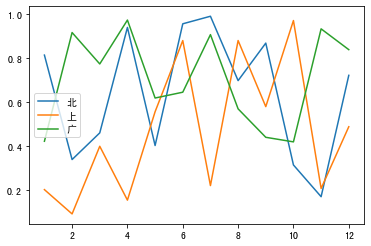

In [5]:
# 多条折线图 - DataFrame
pd.DataFrame(np.random.rand(12,3),
            index=list(range(1,13)),
            columns=['北', '上', '广']).plot.line()

<AxesSubplot:>

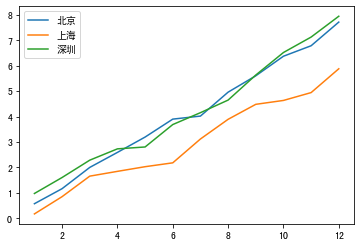

In [6]:
# 累积求和折线图

# cumsum 方法: 累积求和
# print(pd.Series(list(range(1,5))))
# print(pd.Series(list(range(1,5))).cumsum())

pd.DataFrame(np.random.rand(12,3),
            index=list(range(1,13)),
             columns=['北京', '上海', '深圳']).cumsum().plot.line()

<AxesSubplot:>

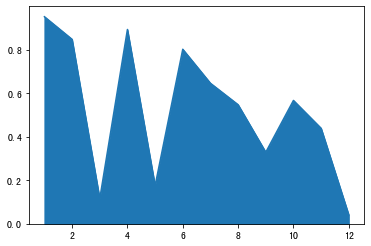

In [7]:
# ------------------- 面积图 ---------------------
# 简单面积图: 即线形图填色后的效果
# pd.Series(np.random.rand(12)).plot.area() # 方法一
pd.Series(np.random.rand(12), index=list(range(1,13))).plot(kind='area') # 方法二

<AxesSubplot:>

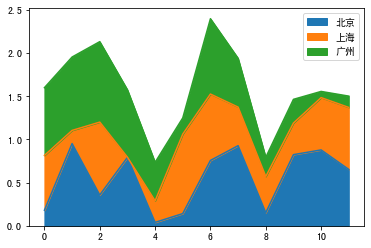

In [8]:
# 堆叠面积图: 多个线形图结果相加
cities = ['北京', '上海', '广州']
data = np.random.rand(12,3)
# print(data)
pd.DataFrame(data, columns=cities).plot.area()

<AxesSubplot:>

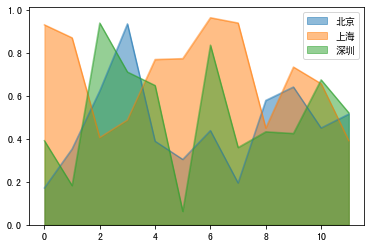

In [9]:
# 多个面积图: 与多条线图类似, 更加直观一些
cities = ['北京', '上海', '深圳']

# stacked : 是否堆叠 True(缺省)
# alpha: 透明度 0-1, 0.5(缺省)
pd.DataFrame(np.random.rand(12,3), columns=cities).plot.area(stacked=False, alpha=0.5)

<AxesSubplot:>

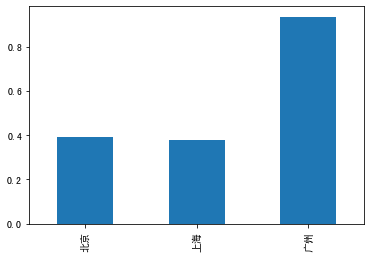

In [10]:
# 柱形图(条形图): 用于对比一行数据之间的差异
cities = ['北京', '上海', '广州']
# pd.Series(np.random.rand(3), index=cities).plot.bar() # 方法一
pd.Series(np.random.rand(3), index=cities).plot(kind='bar') # 方法二

<AxesSubplot:>

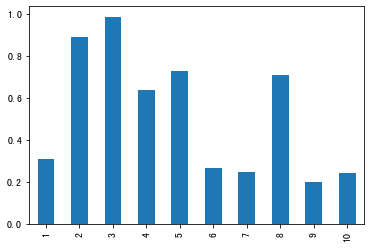

In [11]:
# 柱形图(条形图): 用于对比一行数据的差异
pd.DataFrame(np.random.rand(3,10), index=cities, columns=range(1, 11)).iloc[0].plot.bar()

<AxesSubplot:>

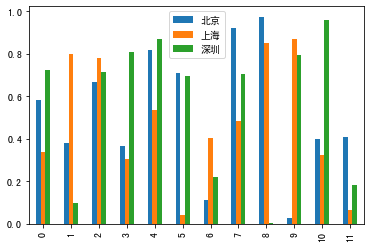

In [12]:
# 多个条形图: 类似于多个线形图
# 用于对比多行数据的差异
cities = ['北京', '上海', '深圳']
pd.DataFrame(np.random.rand(12,3), columns=cities).plot.bar()

<AxesSubplot:>

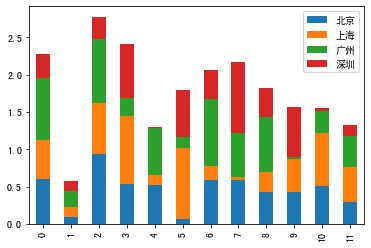

In [13]:
# 堆叠柱形图: 类似于堆叠面积图
# 可以同时观察到总和与分类数据的差异
cities = ['北京', '上海', '广州', '深圳']
pd.DataFrame(np.random.rand(12,4), columns=cities).plot.bar(stacked=True)

<AxesSubplot:>

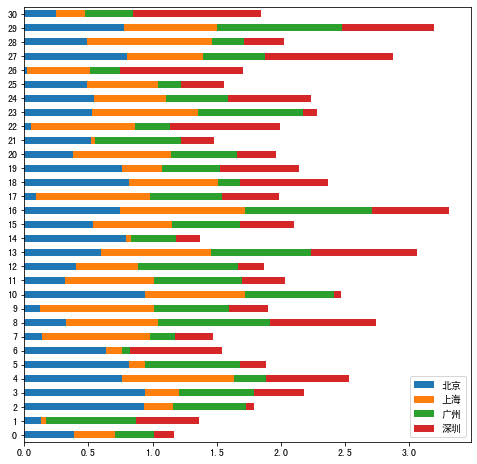

In [14]:
# 横向柱形图(水平柱形图)
# figsize: 指定图形绘制区域大小, 英寸为单位
pd.DataFrame(np.random.rand(31,4), columns=cities).plot.barh(stacked=True, figsize=(8,8))

<AxesSubplot:ylabel='None'>

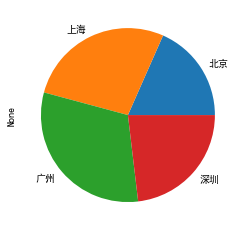

In [15]:
# 饼图(pie): 用于对比数据的差异(占比)
# pd.Series(np.random.rand(4), index=cities).plot.pie() # 方法一
pd.Series(np.random.rand(4)+1, index=cities).plot(kind='pie') # 方法二

array([<AxesSubplot:ylabel='一月'>, <AxesSubplot:ylabel='二月'>,
       <AxesSubplot:ylabel='三月'>], dtype=object)

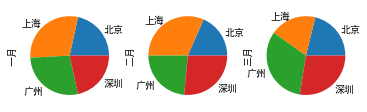

In [16]:
# 多个饼图: 可以用于对比不同时期的数据占比差异

# subplots: True 绘制多个饼图
# legend: False 不绘制图例
pd.DataFrame(np.random.rand(4,3)+1, index=cities, columns=['一月', '二月', '三月']).plot.pie(subplots=True, legend=False)

/home/dango/.virtualenvs/data_analysis/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='None'>

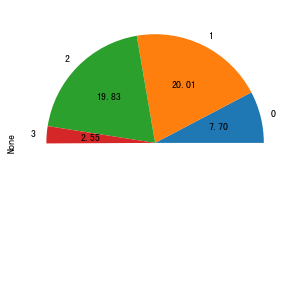

In [17]:
# 不完整饼图: 当数据值总和小于1绘制不完整饼图

# autopct: 显示数据占比比例
pd.Series(np.random.rand(4)/4).plot.pie(autopct='%.2f', figsize=(5,5))

<AxesSubplot:ylabel='Frequency'>

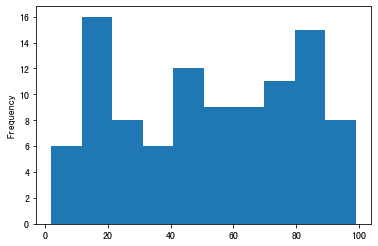

In [18]:
# 直方图: 用于观察数据分布情况
# 在取值范围内, 数据出现的次数

# np.random.randint(1,5,2), 三个参数顺序: 开始范围, 结束范围, 数量
pd.Series(np.random.randint(1,100,100)).plot.hist() # plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

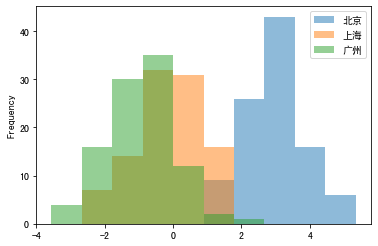

In [19]:
# 多个直方图: 绘制在一起进行对比
cities = ['北京', '上海', '广州']
# np.random.randn 正态分布随机数 以0为中心产生随机数
# pd.DataFrame({'北京':np.random.randn(100)+3, '上海': np.random.randn(100)})
df = pd.DataFrame([np.random.randn(100) + 3, np.random.randn(100), np.random.randn(100) - 1], index=cities)
df = df.stack().unstack(0)
plt.rcParams['axes.unicode_minus']=False # 正常显示负号
df.plot.hist(alpha=0.5)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

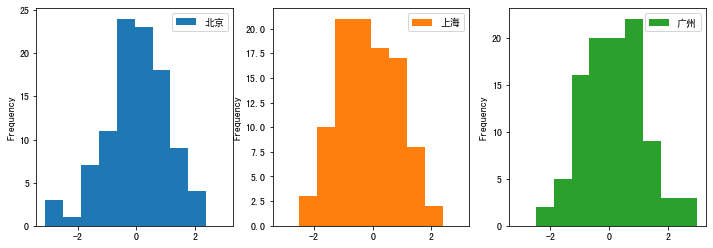

In [20]:
# 多个直方图: 分别绘制

# subplots : True 分别绘制
# layout : 布局方式(x 行, y 列)
df = pd.DataFrame(dict(zip(cities,[np.random.randn(100), np.random.randn(100), np.random.randn(100)])))
df.plot.hist(subplots=True, layout=(1,3), figsize=(12,4))

<AxesSubplot:ylabel='Frequency'>

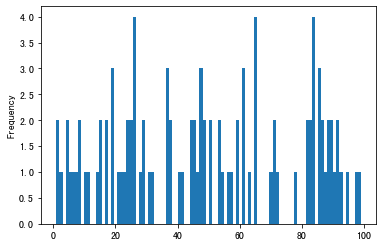

In [21]:
# 直方图参数: bins箱子个数
pd.Series(np.random.randint(1,100,100)).plot.hist(bins=100)

### 直方图总结
* 用于观察数据分布情况
* 在取值范围内, 数据出现的次数 Frequency
* 常用参数
    * subplots : True 分别绘制直方图
    * layout : 布局(行数, 列数)
    * bings : 箱子个数

<AxesSubplot:ylabel='Density'>

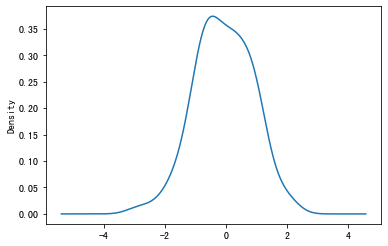

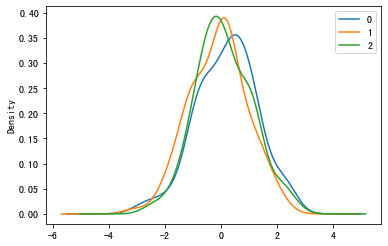

In [34]:
# 核密度图 : 显示数据分布的概率密度
# kde: kernel density estimation

pd.Series(np.random.randn(100)).plot.kde()
pd.DataFrame(np.random.randn(100,3)).plot.kde()

<AxesSubplot:ylabel='Density'>

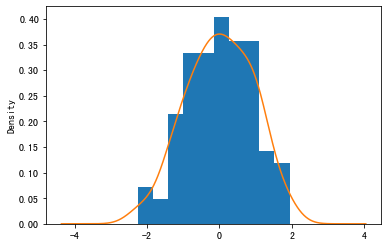

In [23]:
# 直方图 + 密度图
# density : True 换算直方图的结果值 0-1
se = pd.Series(np.random.randn(100))
se.plot.hist(density=True)
se.plot.kde()

### 核密度图 kde
* 显示数据分布的概率密度
* 补充了直方图收到bins参数影响的不足
* 与直方图一起绘制
    * hist(density=True)

<AxesSubplot:>

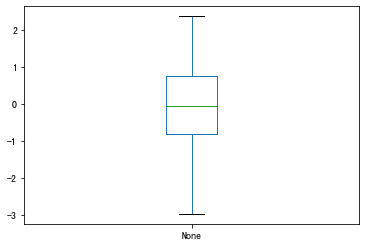

In [24]:
# 盒形图、箱型图 box
# 显示一组数据分散(不是分布)情况
# 可以快速查看异常值, 数据集中趋势, 区间范围

# se = pd.Series([1,1,2,2,3,3,4,5,15])
# print(se.describe())
# se.plot.box()
pd.Series(np.random.randn(100)).plot.box()

<AxesSubplot:>

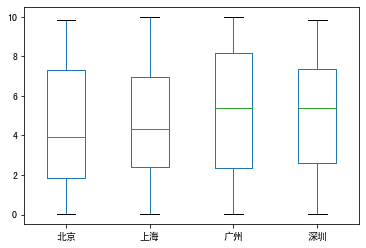

In [25]:
# 多个盒型图: 对比数据分散情况
cities = ['北京', '上海', '广州', '深圳']
pd.DataFrame(np.random.rand(100, 4)* 10, columns=cities).plot.box()

<AxesSubplot:>

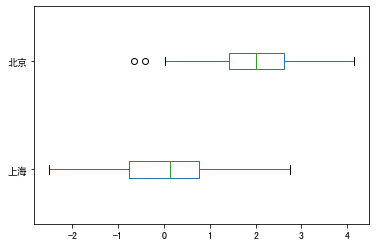

In [26]:
# 横向盒型图
# vert: False 横向
pd.DataFrame({'北京':np.random.randn(100) + 2, '上海':np.random.randn(100)}, columns={'北京', '上海'}).plot.box(vert=False)

### 盒型图
* 显示数据分散情况
* 可以快速查看异常值, 数据集中趋势, 区间范围
* 与hist, kde一起搭配使用观察数据

<AxesSubplot:xlabel='x', ylabel='y'>

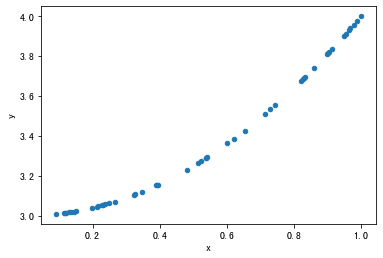

In [27]:
# 散点图 scatter: 用于观察两个数据之间的关系
n = np.random.rand(50)
df_scatter = pd.DataFrame({'x':n, 'y':n*n+3})

df_scatter.plot.scatter(x='x', y='y')

<AxesSubplot:xlabel='x', ylabel='y'>

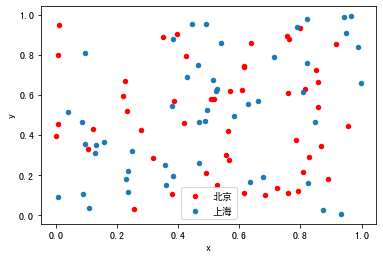

In [28]:
# 多组散点图
df_1 = pd.DataFrame({'x':np.random.rand(50), 'y':np.random.rand(50)})
df_2 = pd.DataFrame({'x':np.random.rand(50), 'y':np.random.rand(50)})

df_1_scatter = df_1.plot.scatter(x='x', y='y', color='red', label='北京')
df_2.plot.scatter(x='x', y='y', ax=df_1_scatter, label='上海')

<AxesSubplot:xlabel='x', ylabel='y'>

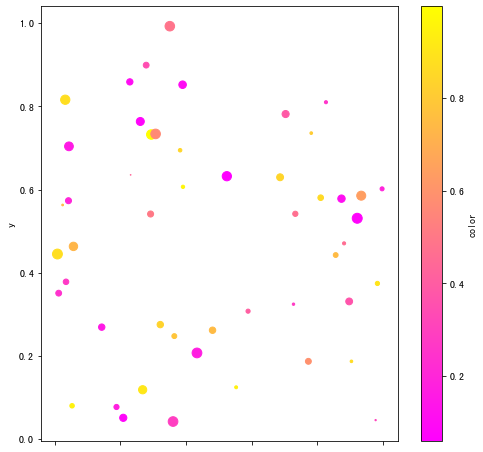

In [29]:
# 散点图参数

df_1 = pd.DataFrame({'x':np.random.rand(50),
                     'y':np.random.rand(50),
                     'color':np.random.rand(50),
                     'size': np.random.rand(50)})

# c: 色彩
# cmap: 色图配置 https://matplotlib.org/examples/color/colormaps_reference.html
# s: 大小 取值最好从10以上,太小看不到
df_1.plot.scatter(x='x', y='y', c='color', s=df_1['size']*100, cmap='spring', figsize=(8,8))

<AxesSubplot:xlabel='x', ylabel='y'>

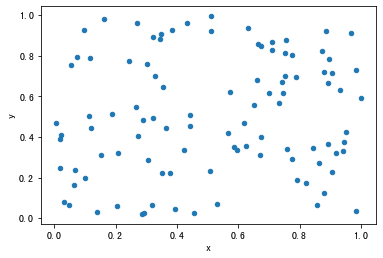

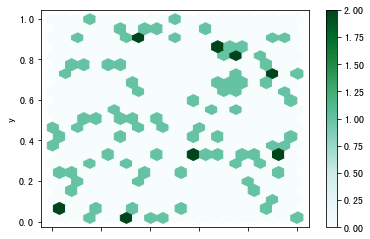

In [30]:
# 六边形点阵图 六边形箱型图 Hexagonal binning plot
# 六边形箱型图可以发现数据的聚集情况
n = np.random.rand(100, 2)
pd.DataFrame(n, columns=['x','y']).plot.scatter(x='x',y='y')
pd.DataFrame(n, columns=['x','y']).plot.hexbin(x='x', y='y', gridsize=20)

### 散点图 六边形点阵图 总结
* 散点图用于观察两个数据之间的关系
* 散点图可以设置颜色、大小
* 常用参数
    * x, y : x轴、y轴
    * c: 色彩
    * cmap: 色图配置 https://matplotlib.org/examples/color/colormaps_reference.html
    * s: 大小 取值最好从10以上, 太小看不到
* 六边形点阵图用于观察数据的聚集情况
* 常用参数
    * x, y : x轴、y轴
    * gridsize: 设置有多少个六边形 经验值: 20以上

In [31]:
# 散点矩阵图 准备数据集
# 鸢尾花
iris = pd.read_csv('./iris.data', header=None)
iris.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.describe(include='all')
# petal 花瓣
# sepal 花萼
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

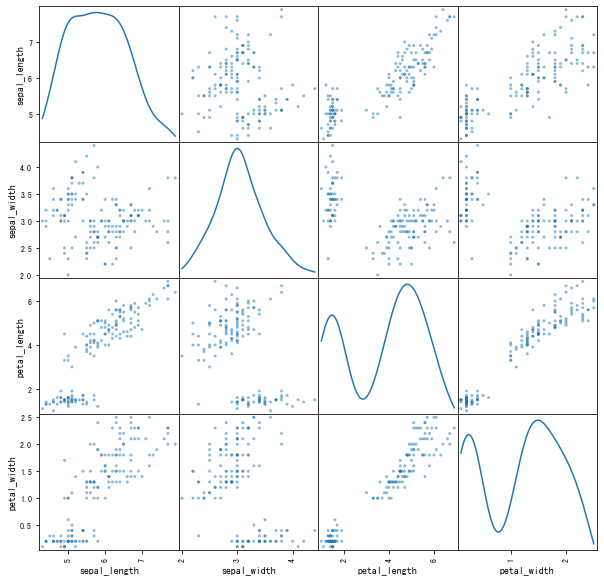

In [32]:
# 散点矩阵图: 对于数据集中的数值数据绘制散点矩阵图
# 对角线绘制直方图hist、密度图kde
# 用于观察多个数值之间的关系和数值本身的分布情况

# scatter_matrix
# diagonal: 对角线图形 直方图hist、密度图kde
pd.plotting.scatter_matrix(iris, diagonal='kde', figsize=(10, 10))

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

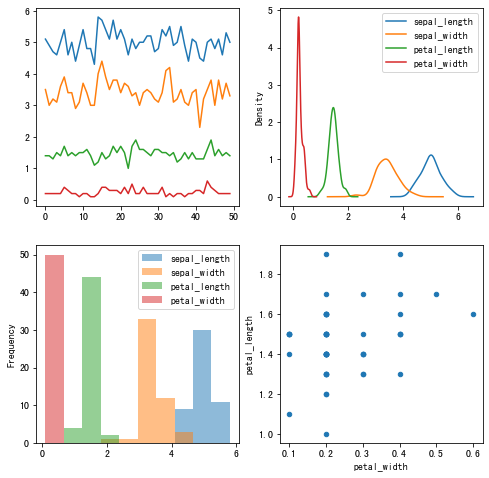

In [33]:
# 绘制多个图表
iris_setosa = iris[iris.species=='Iris-setosa']
fig, axes = plt.subplots(2,2,figsize=(8,8))
# axes: 二维数组[0][0] - [1][1]
iris_setosa.plot.line(ax=axes[0][0], legend=False)
iris_setosa.plot.kde(ax=axes[0][1])
iris_setosa.plot.hist(alpha=0.5, ax=axes[1][0])
iris_setosa.plot.scatter(ax=axes[1][1], x='petal_width', y='petal_length')